# Titanic dataset


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [44]:
#loading data from csv
titanic_df = pd.read_csv('titanic-data.csv')

##  Understanding the data

In [45]:
#cheaking loaded data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	-     Sex	
Age	 -    Age in years	
sibsp	-    # of siblings / spouses aboard the Titanic	
parch	-     # of parents / children aboard the Titanic	
ticket	-    Ticket number	
fare	-   Passenger fare	
cabin	-  Cabin number	
embarked-	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

### Initial Data Wrangling

In [46]:
#dropping unnecessary columns as these colums are not used for anlysis as they are not necessary for analysis
titanic_df=titanic_df.drop(['Ticket','Cabin'],axis = 1) 



In [47]:
#after dropping unnecessary columns how the dataset looks
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [48]:
#inital information of the data set
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [49]:
#different values of the data set
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
# checking missing data

titanic_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

#### Filling in the missing data

In [51]:
# detail show how many passangers embraked the Titanic from S=Southampton,C=Cherbourg,Q=Queenstown
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
# fill the missing value with most occurred port of embarkation 's'
titanic_df['Embarked']=titanic_df['Embarked'].fillna(value='S')


In [53]:
# after filling in the missing data
titanic_df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In case of age of passangers i decide not to remove or fill in the passangers with unknown age as we can still want to how many of passanger from unknown age did survive

##  Data Exploration 

### How many persons survived the Titanic? 

In [54]:
# detail of how many people survived the Titanic
titanic_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [55]:
# detail of how many people survived the Titanic in Percent
alive = len(titanic_df[titanic_df['Survived']==1])
dead  = len(titanic_df[titanic_df['Survived']==0])
per_alive=((alive)/(len(titanic_df))*100)   #finding percentage of alive passangers
per_dead =((dead)/(len(titanic_df))*100)    #finding percentage of dead passangers
print('Passanger who did not survibe (in percentage) =') 
print(per_dead)
print('Passanger who did survibe (in percentage) =') 
print(per_alive)

Passanger who did not survibe (in percentage) =
61.61616161616161
Passanger who did survibe (in percentage) =
38.38383838383838


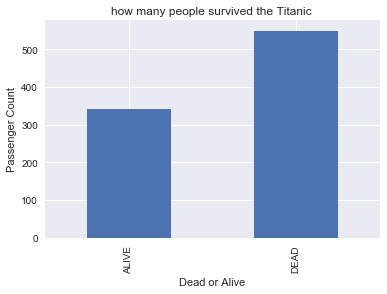

In [56]:
# graph plotted to show how many people survived the Titanic using plot()
dead_alive=pd.DataFrame([alive,dead]) #creating dataframe
dead_alive.index=['ALIVE','DEAD'] # setting index 
dead_alive_plot=dead_alive.plot(kind='bar',title='how many people survived the Titanic ', legend=False) # creating plot
dead_alive_plot.set_xlabel("Dead or Alive")# creating label
dead_alive_plot.set_ylabel("Passenger Count")# creating label

### Which gender survived with a higher count, Male or Female?

In [57]:
#detail of how many male and female survived the Titanic 
titanic_df.groupby('Survived').Sex.value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

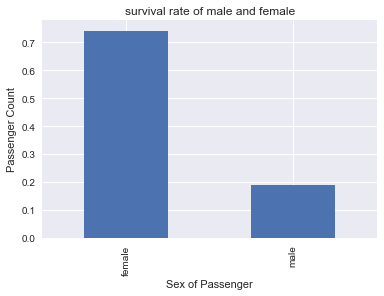

In [58]:
#graph plotted to show survival rate of male and female in the Titanic using plot()

Survial_ratebysex=titanic_df.groupby('Sex').Survived.mean() #finding the survival rate of male and female 
Survial_ratebysex_plot=Survial_ratebysex.plot(kind='bar',title='survival rate of male and female') #creating plot of survival rate
Survial_ratebysex_plot.set_xlabel("Sex of Passenger")
Survial_ratebysex_plot.set_ylabel("Passenger Count")

Female passangers had a higher survial rate than that of male passangers

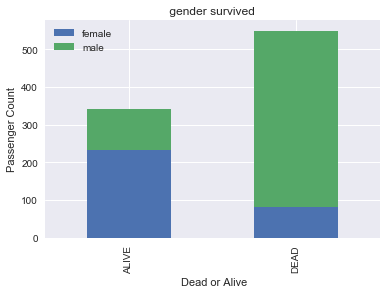

In [59]:
# comparing how many passangers survived the titanic and how many of thoese passangers were male and female
alive_sex = titanic_df[titanic_df['Survived']==1]['Sex'].value_counts()
dead_sex = titanic_df[titanic_df['Survived']==0]['Sex'].value_counts()
survivior = pd.DataFrame([alive_sex,dead_sex])
survivior.index=['ALIVE','DEAD']
survivior_plot=survivior.plot(kind='bar',stacked=True,title=' gender survived ')
survivior_plot.set_xlabel(" Dead or Alive")
survivior_plot.set_ylabel("Passenger Count")

549 passanger out of 891  passangers on Titanic did not survive the sinking ship according to the data set which is about 62% of the passangers

### Which P class had the most survivors?

In [60]:
# detail show how many passangers were in different class using value_counts()
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Around 55% of the passengers on the Titanic were lower class passengers.

In [61]:
# detail show how many passangers survived in different class using value_counts()
titanic_df.groupby('Pclass').Survived.value_counts() #1= survived 0=dead

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

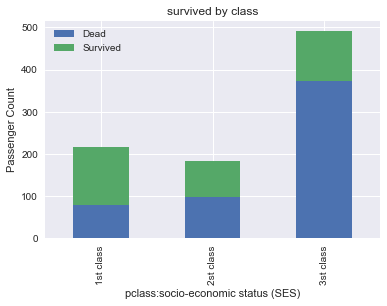

In [62]:
# creating crosstab to use 'pclass' and 'Survived' data to creat plot
class_plot=pd.crosstab(titanic_df['Pclass'],titanic_df['Survived'])
# using class_plot variable to plot graph
class_plot.index=['1st class','2st class','3st class']
class_plot_plot=class_plot.plot(kind='bar',stacked=True,title='survived by class')
class_plot_plot.legend(["Dead", "Survived"])
class_plot_plot.set_xlabel(" pclass:socio-economic status (SES) ")
class_plot_plot.set_ylabel("Passenger Count")

From the  plot, it looks like passenger in 1st class have higher number of survivors than that of 2nd and 3rd class passengers although the number of 3rd class passenger nearly 3 time more than that of 1st class.

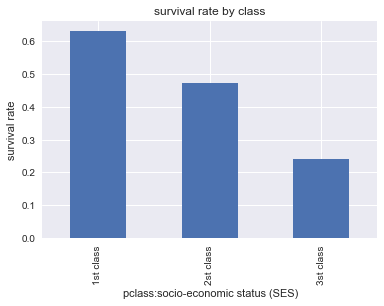

In [63]:
# plotting survial rate of passangers on the basis of class
survival_rate=titanic_df.groupby('Pclass').Survived.mean()
survival_rate.index =['1st class','2st class','3st class']
survival_rate_plot=survival_rate.plot(kind='bar',stacked=True,title='survival rate by class')
survival_rate_plot.set_xlabel(" pclass:socio-economic status (SES)")
survival_rate_plot.set_ylabel("survival rate")

survival rate of 1st class passangers are higher the rest of the class

###  Which age group survived ?

In [64]:
# creating age group bin to sort the age group of the passangers 
def age_passanger(age):
    
    if age >=90:
        return '90+'
    elif age >=80:
        return '80-90'
    elif age >=70:
        return '70-80'
    elif age >=60:
        return '60-70'
    elif age >=50:
        return '50-60'
    elif age >=40:
        return '40-50' 
    elif age >=30:
        return '30-40'
    elif age >=20:
        return '20-30'
    elif age >=10:
        return '10-20'
    elif age >=0:
        return '0-10'
    else :
        return 'unknown age'

In [65]:
#using apply function 
titanic_df['age']=titanic_df['Age'].apply(age_passanger)
age_bin=pd.crosstab(titanic_df['age'],titanic_df['Survived'])

note: i decide not to remove the passangers with unknown age as we can still want to how many of passanger from 
unknown age did survive

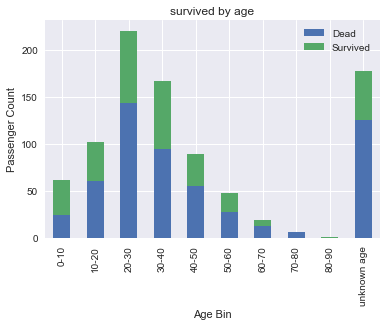

In [66]:
# plotting survivor count using age_bin
age_bin_plot=age_bin.plot(kind='bar',stacked=True,title='survived by age')
age_bin_plot.legend(["Dead", "Survived"])
age_bin_plot.set_xlabel("Age Bin")
age_bin_plot.set_ylabel("Passenger Count")
#note i decide not to remove the passangers with unknown age as we can still want to how many of passanger from 
#unknown age did survive

It looks like higher number of children(0-20) survived. Rest of age bin have lower number of survivers

### Did the Port of Embarkation has any role to play in survial of passangers?

In [67]:
# detail show how many passangers embraked the Titanic from S=Southampton,C=Cherbourg,Q=Queenstown
titanic_df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Most of the passengers embarked from Southampton

In [68]:
#  detail show how many passangers survived the Titanic from S=Southampton,C=Cherbourg,Q=Queenstown
titanic_df.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

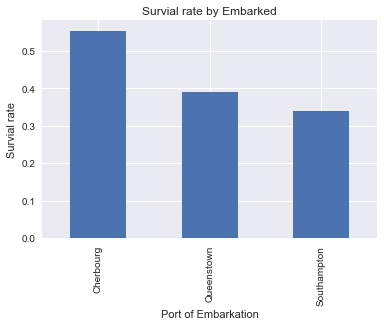

In [69]:
# using Port of Embarkation a plot of survival rate of passengers  has been plotted
Survial_ratebyEmbarked=titanic_df.groupby('Embarked').Survived.mean()
Survial_ratebyEmbarked.index=('Cherbourg','Queenstown','Southampton')
Survial_ratebyEmbarked_plot=Survial_ratebyEmbarked.plot(kind='bar',title='Survial rate by Embarked')
Survial_ratebyEmbarked_plot.set_ylabel("Survial rate")
Survial_ratebyEmbarked_plot.set_xlabel("Port of Embarkation")

Passenger embarked from Cherbourg had a higher survival rate than of Queenstown and Southampton.
Though it is unclear what is the reason behind it.

### Final Plot 

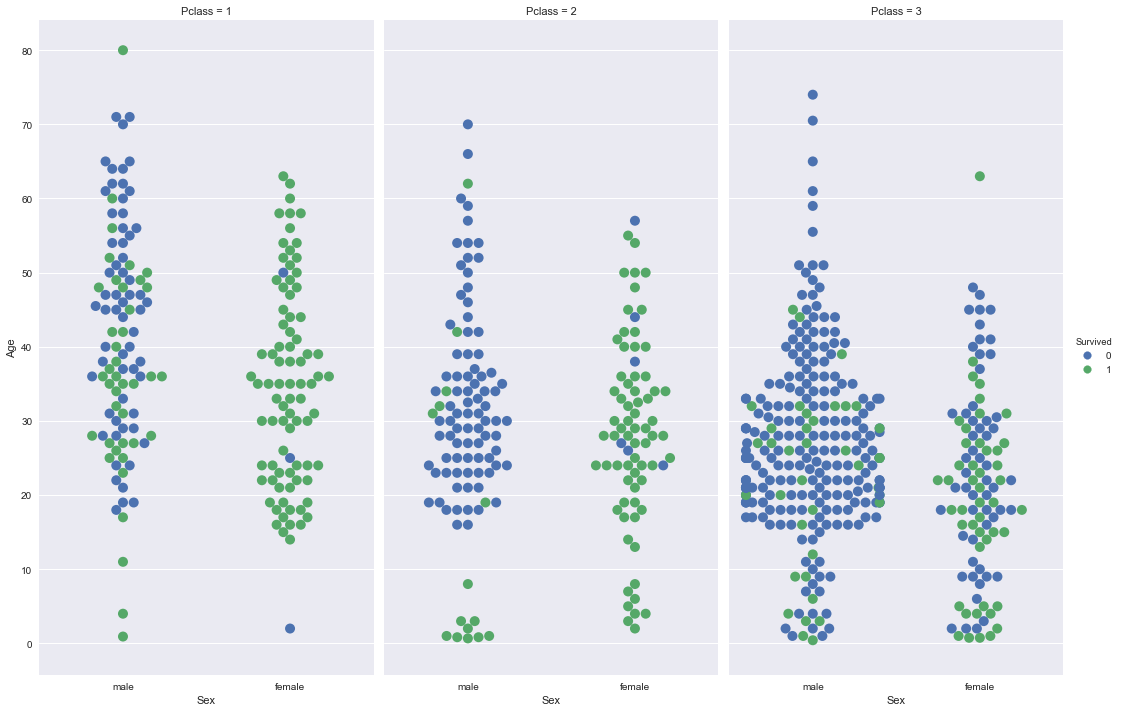

In [70]:
# plot created using groups of class ,age bin and sex to provide better reprentation of data
sns.factorplot(data=titanic_df, col='Pclass', x='Sex', y='Age', hue='Survived', 
               kind='swarm', size=10, aspect=0.5, s=10)
plt.yticks(np.arange(0,81,10));

This plot shows a overall picture of how many passangers survived the sinking ship with respect to class ,sex ,and age


## Conclusion

RMS Titanic made her maiden voyage on 15 April 1912 and sank after colliding with an iceberg killing more than 1,500  out of 2224 Passenger and crew.One of the main reasons such huge loss of life were lack of lifeboat.Some group of people was likely to survive than the others. 


#### Limitation of the data set


In the above data set, we have detail of only 891 passengers where as there were about 2224 Passenger in RMS Titanic
About 1330 passenger data were missing from the data set so it safe to we can not provide a solid conclusion which group of passengers did survive the Titanic. The analysis in this project is completely based on 891 passengers in the data set 

More over 177 passenger age was also unknown in the data set which makes it difficult to which age group survived the sinking of Titanic. 

If we had a detail of all the passenger it could have helped us to reach a solid conclusion.

#### How many persons survived the Titanic? 

549 passenger out of 891  passengers on Titanic did not survive the sinking ship according to the data set which is about 62% of the passengers in the data set which is nearly about the same percentage of people who were killed in the tragedy.

#### Which gender survived with a higher count, Male or Female?

From the plotted graph it is clear that rate of survival of female significantly higher than male. It looks like female were rescued first.

#### Which P class had the most survivors?

We can clearly see that survival rate of a 1st class passengers was clearly higher than that of 2nd class and 3rd class.

Following may be the reason why there is such huge difference in survival rate

1.1st class passengers were given priority over other 2 classes

2.May be the location of 1st Class cabins were away impact point of iceberg


#### Which age group survived ?

177 Passengers age were unknown and most of thoese passangers did not survived.


It looks like higher number of children(0-20) survived.
Rest of age bin have lower number of survivers.


It is clear that children along with female were given priority male adults 

## Bibliography

1.https://www.google.co.in/search?q=bibliography&oq=bibl&aqs=chrome.3.69i57j0l5.3705j0j7&sourceid=chrome&ie=UTF-8

2.https://review.udacity.com/#!/reviews/731829